In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)

red_path = "./res/winequality-red.csv"
white_path = "./res/winequality-white.csv"
result_folder = "./results/"

test_set_ratio = 0.1

### Preprocessing

In [3]:
## preprocessing
## read red and white wine
df_red = pd.read_csv(red_path,";")
df_white = pd.read_csv(white_path, ";")


#df_ = pd.concat([df_red])
#df_ = pd.concat([df_white])
df_ = pd.concat([df_red,df_white])


## add ID column
df_['ID'] = df_.index


## create train/test for both for prediction (not training it)
df_train, df_test = train_test_split(df_, shuffle=True, test_size=test_set_ratio, random_state=0)
df_train = df_train.sort_values(by=['ID']).reset_index(drop=True)
df_test = df_test.sort_values(by=['ID']).reset_index(drop=True)

In [ ]:
#################### Separate red/white train test sets
## add ID column
#df_red['ID'] = df_red.index
#df_white['ID'] = df_red.shape[0] + df_white.index

## create train/test for both for testing the classifier (not training it)
#df_red_train, df_red_test = train_test_split(df_red, shuffle=True, test_size=test_set_ratio, random_state=random_state)
#df_red_train = df_red_train.sort_values(by=['ID']).reset_index(drop=True)
#df_red_test = df_red_test.sort_values(by=['ID']).reset_index(drop=True)

#df_white_train, df_white_test = train_test_split(df_white, shuffle=True, test_size=test_set_ratio, random_state=random_state)
#df_white_train = df_white_train.sort_values(by=['ID']).reset_index(drop=True)
#df_white_test = df_white_test.sort_values(by=['ID']).reset_index(drop=True)

In [4]:
df_train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ID
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
3,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
4,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
7,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
8,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,4
9,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5


### Initialize Training data

In [5]:
df_vars = df_train.loc[:, df_train.columns != 'quality']
df_class = df_train['quality']

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=test_set_ratio, random_state=0)
clf = SVC(gamma='auto')

### Simple cross validation for well-founded results

In [9]:
scores = cross_validate(clf, df_vars, df_class, cv=5)
scores['test_score']

array([0.41467577, 0.29230769, 0.26324786, 0.21232877, 0.42587832])

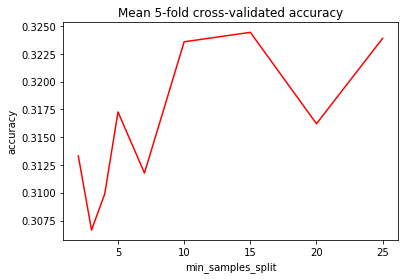

In [11]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Model fitting and sample testing

In [12]:
model = clf.fit(X_train, y_train)
model.score(X_test, y_test)

0.5435897435897435

### Final prediction

In [14]:
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['quality'] = pd.Series(model.predict(df_test.loc[:,df_test.columns != 'quality']))
df_res.head(10)
#np.count_nonzero(df_res['quality']==df_test['quality'])

,ID,quality
0,2,6
1,8,5
2,12,4
3,14,5
4,15,5
5,16,4
6,23,5
7,34,5
8,34,5
9,39,7


### Export

In [ ]:
export_file_name = result_folder + "simple_svm.csv"
df_res.to_csv(export_file_name, index=False)

### Easy comparison

In [16]:
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_score'],
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="Accuracy on Test Set (Wine Quality)")
    
py.iplot(go.Figure(data=traces, layout=layout))

NameError: name 'names' is not defined